# PROBLEM 1- CLUSTERING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from scipy import stats
import scipy.cluster.hierarchy as sch 
from scipy. cluster. hierarchy import dendrogram,linkage,fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
bm=pd.read_csv("bank_marketing_part1_Data-1.csv")
bm

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
...,...,...,...,...,...,...,...
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443


# 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [3]:
bm.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
bm.tail()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
205,13.89,14.02,0.8880,5.439,3.199,3.986,4.738
206,16.77,15.62,0.8638,5.927,3.438,4.920,5.795
207,14.03,14.16,0.8796,5.438,3.201,1.717,5.001
208,16.12,15.00,0.9000,5.709,3.485,2.270,5.443
209,15.57,15.15,0.8527,5.920,3.231,2.640,5.879


In [5]:
bm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [6]:
bm.dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

In [7]:
bm.shape

(210, 7)

In [8]:
bm.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [9]:
bm.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [10]:
bm.duplicated().sum()

0

In [11]:
#checking for statistcal summary of all the Variables
#Plotting distplot with probability density of all the variables
#Visualizing the data to see if there are any outliers in all variables

In [12]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(bm[column].describe(),end=' ')
    
    print('\n')
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(bm[column], kde=True, color='b');
    plt.show()
    
    print('\n')
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=bm[column])
    plt.show()

In [13]:
bm_num = bm.select_dtypes(include = ['float64'])
lstnumericcolumns = list(bm_num.columns.values)
len(lstnumericcolumns)

7

Description of spending
----------------------------------------------------------------------------
count    210.000000
mean      14.847524
std        2.909699
min       10.590000
25%       12.270000
50%       14.355000
75%       17.305000
max       21.180000
Name: spending, dtype: float64 

Distribution of spending
----------------------------------------------------------------------------


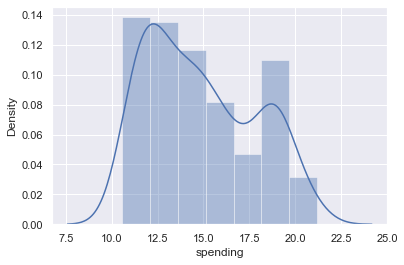



BoxPlot of spending
----------------------------------------------------------------------------


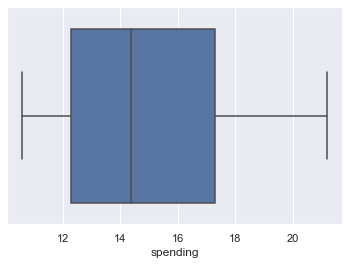

Description of advance_payments
----------------------------------------------------------------------------
count    210.000000
mean      14.559286
std        1.305959
min       12.410000
25%       13.450000
50%       14.320000
75%       15.715000
max       17.250000
Name: advance_payments, dtype: float64 

Distribution of advance_payments
----------------------------------------------------------------------------


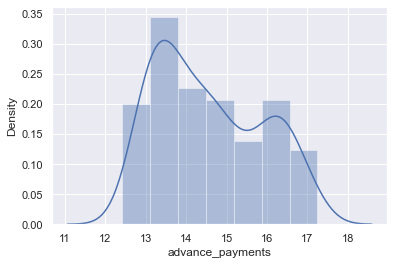



BoxPlot of advance_payments
----------------------------------------------------------------------------


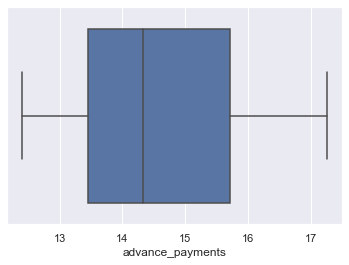

Description of probability_of_full_payment
----------------------------------------------------------------------------
count    210.000000
mean       0.870999
std        0.023629
min        0.808100
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64 

Distribution of probability_of_full_payment
----------------------------------------------------------------------------


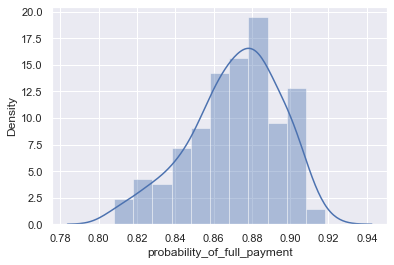



BoxPlot of probability_of_full_payment
----------------------------------------------------------------------------


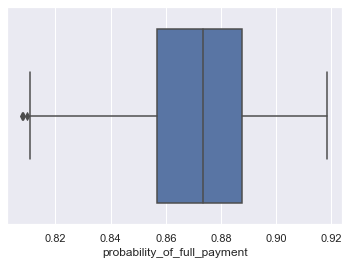

Description of current_balance
----------------------------------------------------------------------------
count    210.000000
mean       5.628533
std        0.443063
min        4.899000
25%        5.262250
50%        5.523500
75%        5.979750
max        6.675000
Name: current_balance, dtype: float64 

Distribution of current_balance
----------------------------------------------------------------------------


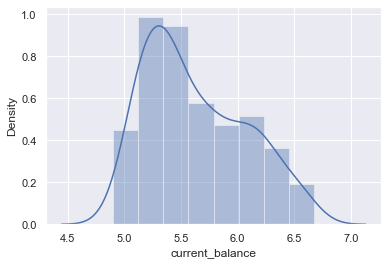



BoxPlot of current_balance
----------------------------------------------------------------------------


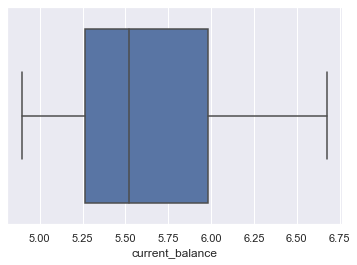

Description of credit_limit
----------------------------------------------------------------------------
count    210.000000
mean       3.258605
std        0.377714
min        2.630000
25%        2.944000
50%        3.237000
75%        3.561750
max        4.033000
Name: credit_limit, dtype: float64 

Distribution of credit_limit
----------------------------------------------------------------------------


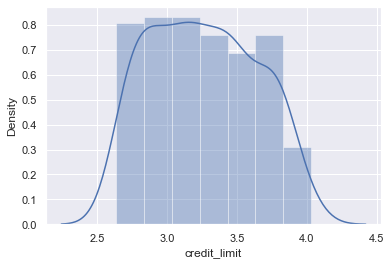



BoxPlot of credit_limit
----------------------------------------------------------------------------


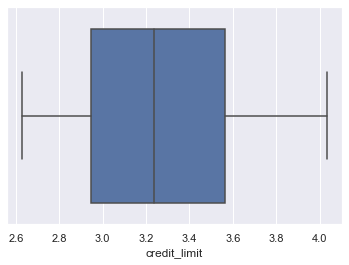

Description of min_payment_amt
----------------------------------------------------------------------------
count    210.000000
mean       3.700201
std        1.503557
min        0.765100
25%        2.561500
50%        3.599000
75%        4.768750
max        8.456000
Name: min_payment_amt, dtype: float64 

Distribution of min_payment_amt
----------------------------------------------------------------------------


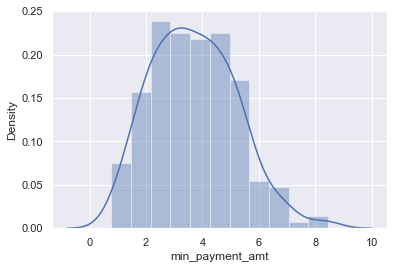



BoxPlot of min_payment_amt
----------------------------------------------------------------------------


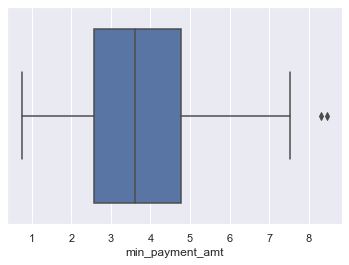

Description of max_spent_in_single_shopping
----------------------------------------------------------------------------
count    210.000000
mean       5.408071
std        0.491480
min        4.519000
25%        5.045000
50%        5.223000
75%        5.877000
max        6.550000
Name: max_spent_in_single_shopping, dtype: float64 

Distribution of max_spent_in_single_shopping
----------------------------------------------------------------------------


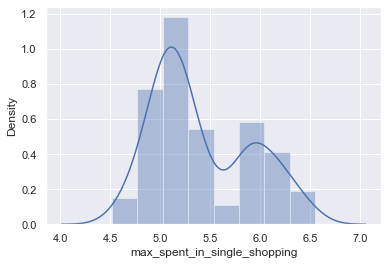



BoxPlot of max_spent_in_single_shopping
----------------------------------------------------------------------------


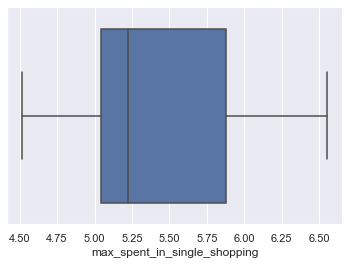

In [14]:
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x,20)

In [15]:
#checking outliers proportion

In [16]:
#checking for Outliers in the Spending Variable
#Calculating Quartiles
Q1=bm['spending'].quantile(q=0.25)
Q3=bm['spending'].quantile(q=0.75)
IQR=Q3-Q1
print('spending Q1 is: ', Q1)
print('spending Q3 is: ', Q3)
print('Interquartile range (IQR) of spending is ', stats.iqr(bm['spending']))

spending Q1 is:  12.27
spending Q3 is:  17.305
Interquartile range (IQR) of spending is  5.035


In [17]:
#Detecting outliers in the lower and upper range of Spending variable
#lower range is Q1-1.5*IQR
#upper range is Q3+1.5*IQR
L_outliers=Q1-1.5*(IQR)
U_outliers=Q3+1.5*(IQR)
print('Lower outliers in spending: ', L_outliers)
print('Upper outliers in spending: ', U_outliers)

Lower outliers in spending:  4.717499999999999
Upper outliers in spending:  24.8575


In [18]:
#checking for Outliers in the 'advance_payments' Variable
#Calculating Quartiles
Q1=bm['advance_payments'].quantile(q=0.25)
Q3=bm['advance_payments'].quantile(q=0.75)
IQR=Q3-Q1
print('advance_payments Q1 is: ', Q1)
print('advance_payments Q3 is: ', Q3)
print('IQR of advance_payments is ', stats.iqr(bm['advance_payments']))

advance_payments Q1 is:  13.45
advance_payments Q3 is:  15.715
IQR of advance_payments is  2.2650000000000006


In [19]:
#Detecting outliers in the lower and upper range of 'advance_payments' variable
#lower range is Q1-1.5*IQR
#upper range is Q3+1.5*IQR
L_outliers=Q1-1.5*(IQR)
U_outliers=Q3+1.5*(IQR)
print('Lower outliers in advance_payments: ', L_outliers)
print('Upper outliers in advance_payments: ', U_outliers)

Lower outliers in advance_payments:  10.052499999999998
Upper outliers in advance_payments:  19.1125


In [20]:
#checking for Outliers in the 'probability_of_full_payment' Variable
#Calculating Quartiles
Q1=bm['probability_of_full_payment'].quantile(q=0.25)
Q3=bm['probability_of_full_payment'].quantile(q=0.75)
IQR=Q3-Q1
print('probability_of_full_payment Q1 is: ', Q1)
print('probability_of_full_payment Q3 is: ', Q3)
print('IQR of probability_of_full_payment is ', stats.iqr(bm['probability_of_full_payment']))

probability_of_full_payment Q1 is:  0.8569
probability_of_full_payment Q3 is:  0.887775
IQR of probability_of_full_payment is  0.030874999999999986


In [21]:
#Detecting outliers in the lower and upper range of 'probability_of_full_payment' varia
#lower range is Q1-1.5*IQR
#upper range is Q3+1.5*IQR
L_outliers=Q1-1.5*(IQR)
U_outliers=Q3+1.5*(IQR)
print('Lower outliers in probability_of_full_payment: ', L_outliers)
print('Upper outliers in probability_of_full_payment: ', U_outliers)

Lower outliers in probability_of_full_payment:  0.8105875
Upper outliers in probability_of_full_payment:  0.9340875


In [22]:
#checking for Outliers in the 'current_balance' Variable
#Calculating Quartiles
Q1=bm['current_balance'].quantile(q=0.25)
Q3=bm['current_balance'].quantile(q=0.75)
IQR=Q3-Q1
print('current_balance Q1 is: ', Q1)
print('current_balance Q3 is: ', Q3)
print('IQR of current_balance is ', stats.iqr(bm['current_balance']))

current_balance Q1 is:  5.26225
current_balance Q3 is:  5.97975
IQR of current_balance is  0.7175000000000002


In [23]:
#Detecting outliers in the lower and upper range of 'current_balance' variable
#lower range is Q1-1.5*IQR
#upper range is Q3+1.5*IQR
L_outliers=Q1-1.5*(IQR)
U_outliers=Q3+1.5*(IQR)
print('Lower outliers in current_balance: ', L_outliers)
print('Upper outliers in current_balance: ', U_outliers)

Lower outliers in current_balance:  4.186
Upper outliers in current_balance:  7.056000000000001


In [24]:
#checking for Outliers in the 'credit_limit' Variable
#Calculating Quartiles
Q1=bm['credit_limit'].quantile(q=0.25)
Q3=bm['credit_limit'].quantile(q=0.75)
IQR=Q3-Q1
print('credit_limit Q1 is: ', Q1)
print('credit_limit Q3 is: ', Q3)
print('IQR of credit_limit is ', stats.iqr(bm['credit_limit']))

credit_limit Q1 is:  2.944
credit_limit Q3 is:  3.56175
IQR of credit_limit is  0.61775


In [25]:
#Detecting outliers in the lower and upper range of 'credit_limit' variable
#lower range is Q1-1.5*IQR
#upper range is Q3+1.5*IQR
L_outliers=Q1-1.5*(IQR)
U_outliers=Q3+1.5*(IQR)
print('Lower outliers in credit_limit: ', L_outliers)
print('Upper outliers in credit_limit: ', U_outliers)

Lower outliers in credit_limit:  2.017375
Upper outliers in credit_limit:  4.488375


In [26]:
#checking for Outliers in the 'min_payment_amt' Variable
#Calculating Quartiles
Q1=bm['min_payment_amt'].quantile(q=0.25)
Q3=bm['min_payment_amt'].quantile(q=0.75)
IQR=Q3-Q1
print('min_payment_amt Q1 is: ', Q1)
print('min_payment_amt Q3 is: ', Q3)
print('IQR of min_payment_amt is ', stats.iqr(bm['min_payment_amt']))

min_payment_amt Q1 is:  2.5615
min_payment_amt Q3 is:  4.76875
IQR of min_payment_amt is  2.2072499999999997


In [27]:
#Detecting outliers in the lower and upper range of 'min_payment_amt' variable
#lower range is Q1-1.5*IQR
#upper range is Q3+1.5*IQR
L_outliers=Q1-1.5*(IQR)
U_outliers=Q3+1.5*(IQR)
print('Lower outliers in min_payment_amt: ', L_outliers)
print('Upper outliers in min_payment_amt: ', U_outliers)

Lower outliers in min_payment_amt:  -0.7493749999999992
Upper outliers in min_payment_amt:  8.079625


In [28]:
#checking for Outliers in the 'max_spent_in_single_shopping' Variable
#Calculating Quartiles
Q1=bm['max_spent_in_single_shopping'].quantile(q=0.25)
Q3=bm['max_spent_in_single_shopping'].quantile(q=0.75)
IQR=Q3-Q1
print('max_spent_in_single_shopping Q1 is: ', Q1)
print('max_spent_in_single_shopping Q3 is: ', Q3)
print('IQR of max_spent_in_single_shopping is ', stats.iqr(bm['max_spent_in_single_shopping']))

max_spent_in_single_shopping Q1 is:  5.045
max_spent_in_single_shopping Q3 is:  5.877
IQR of max_spent_in_single_shopping is  0.8319999999999999


In [29]:
#Detecting outliers in the lower and upper range of 'max_spent_in_single_shopping' variable
#lower range is Q1-1.5*IQR
#upper range is Q3+1.5*IQR
L_outliers=Q1-1.5*(IQR)
U_outliers=Q3+1.5*(IQR)
print('Lower outliers in max_spent_in_single_shopping: ', L_outliers)
print('Upper outliers in max_spent_in_single_shopping: ', U_outliers)

Lower outliers in max_spent_in_single_shopping:  3.797
Upper outliers in max_spent_in_single_shopping:  7.125


In [30]:
#calculate the skewness for each plot

In [31]:
bm.skew().sort_values(ascending=False)

max_spent_in_single_shopping    0.561897
current_balance                 0.525482
min_payment_amt                 0.401667
spending                        0.399889
advance_payments                0.386573
credit_limit                    0.134378
probability_of_full_payment    -0.537954
dtype: float64

In [32]:
#check for multicollinearity for all the variables

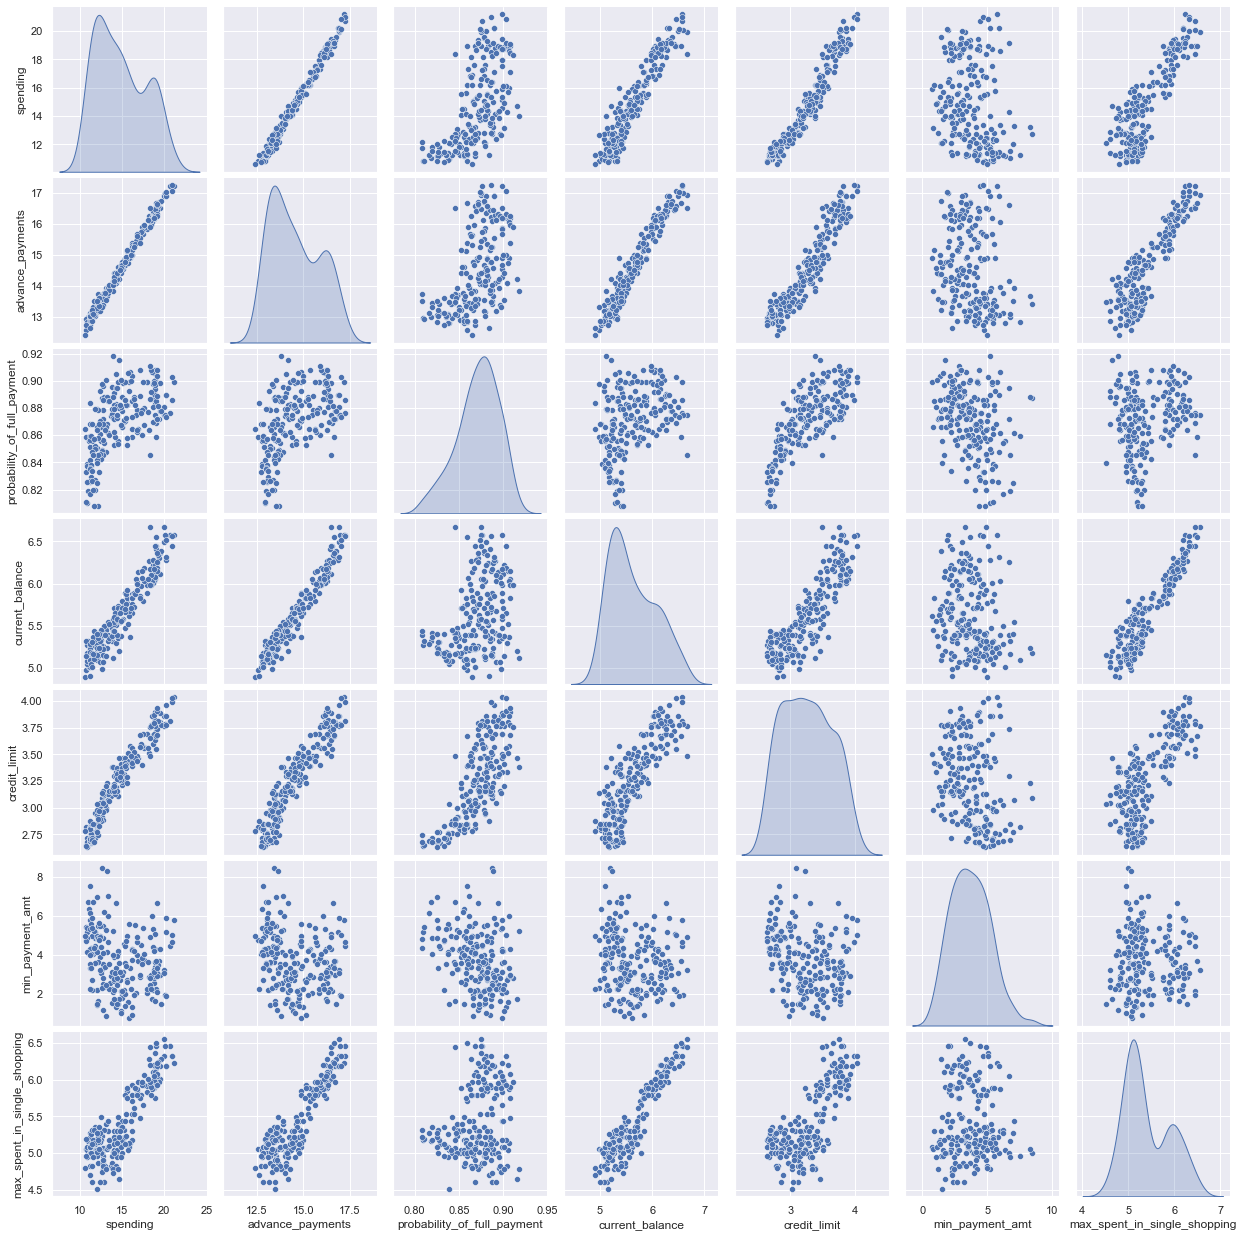

In [33]:
sns.pairplot(bm,diag_kind='kde');

In [34]:
#Creating a correlation matrix for better understanding of the variable relationship

In [35]:
bm.corr().T

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


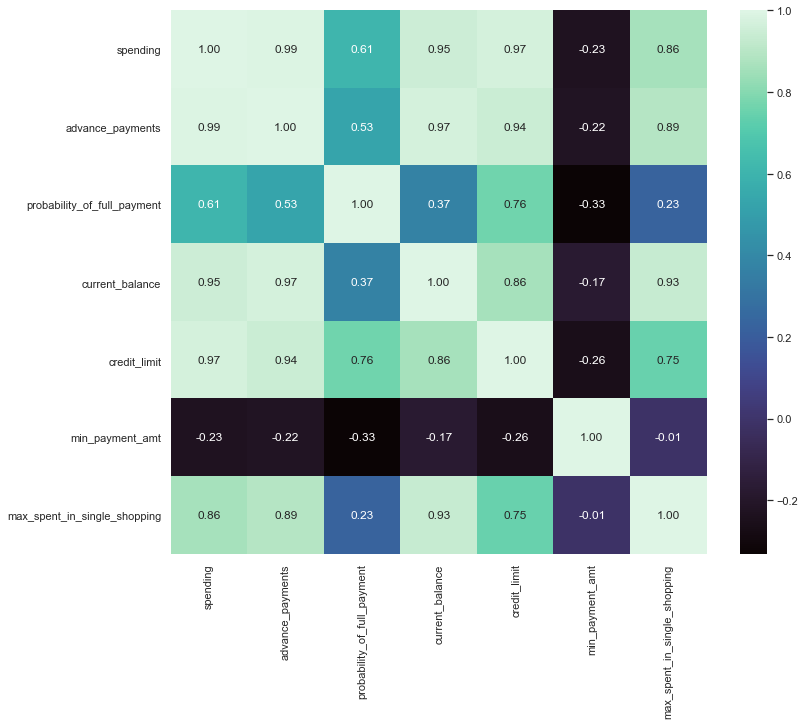

In [36]:
#creating a heatmap for better visualization
plt.figure(figsize=(12,10))
sns.heatmap(bm.corr(),annot=True,fmt=".2f",cmap="mako")
plt.show()

# 1.2  Do you think scaling is necessary for clustering in this case? Justify

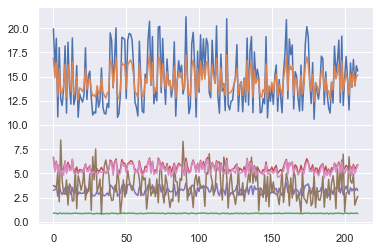

In [37]:
#graph before scaling the data
plt.plot(bm)
plt.show()

In [38]:
# Scaling the data.

In [39]:
from scipy.stats import zscore
scaled_data=bm.apply(zscore)
scaled_data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813


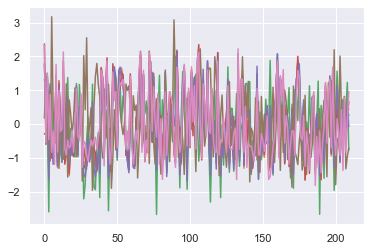

In [40]:
#graph after scaling the data
plt.plot(scaled_data)
plt.show()

# 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

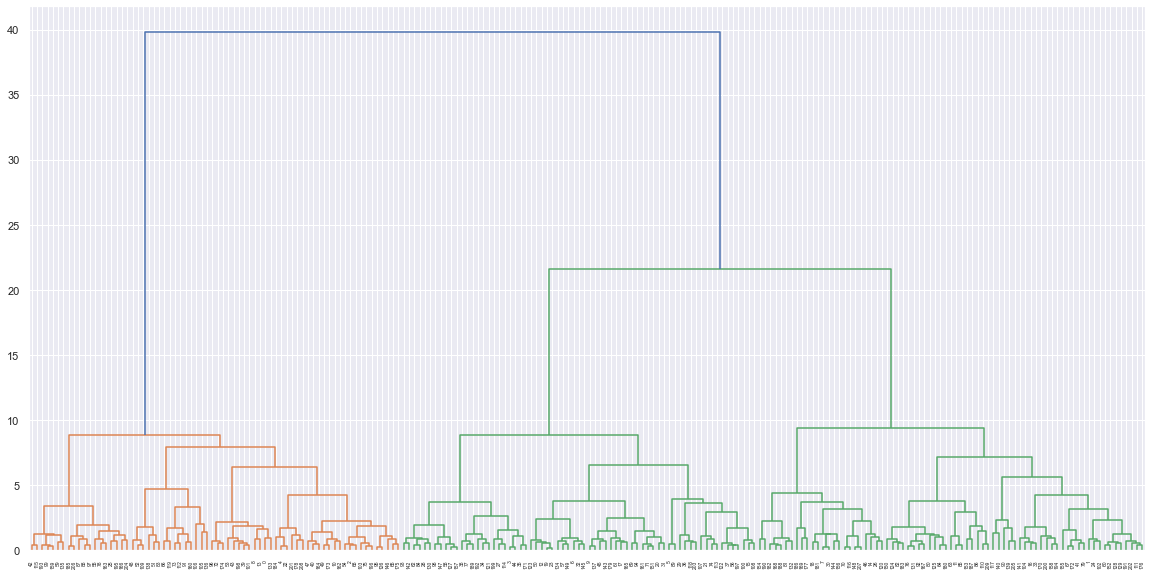

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(20,10))
wardlinkage = linkage(scaled_data, method = 'ward')
dend_wardlinkage = dendrogram(wardlinkage)
plt.show()

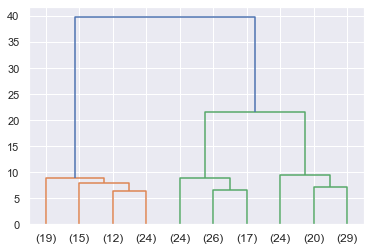

In [42]:
dend_wardlinkage = dendrogram(wardlinkage,
                              truncate_mode='lastp',
                              p = 10,
                             )

In [43]:
wardlinkage_clusters_1 = fcluster(wardlinkage, 3, criterion='maxclust')
wardlinkage_clusters_1

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [44]:
wardlinkage_clusters_2 = fcluster(wardlinkage, 10, criterion='distance')
wardlinkage_clusters_2

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [45]:
wardlinkage_clustered_1_data=bm.copy()

In [46]:
wardlinkage_clustered_1_data['3Clusters'] = wardlinkage_clusters_1

In [47]:
wardlinkage_clustered_1_data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,3Clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1


In [48]:
wardlinkage_clustered_1_data['3Clusters'].value_counts().sort_index()

1    70
2    67
3    73
Name: 3Clusters, dtype: int64

In [49]:
aggdata=wardlinkage_clustered_1_data.groupby('3Clusters').mean()
aggdata['Freq']=wardlinkage_clustered_1_data['3Clusters'].value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
3Clusters,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848072,5.238940,2.848537,4.949433,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


# 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [50]:
kmeans = KMeans(n_clusters = 1)
kmeans.fit(scaled_data)
kmeans.labels_
kmeans.inertia_

1469.9999999999995

In [51]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_data)
kmeans.inertia_

659.1717544870411

In [52]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(scaled_data)
kmeans.inertia_

430.65897315130064

In [53]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(scaled_data)
kmeans.inertia_

371.6531439995162

In [54]:
wss =[]

In [55]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_data)
    wss.append(KM.inertia_)

In [56]:
wss

[1469.9999999999995,
 659.1717544870411,
 430.65897315130064,
 371.2935481943967,
 327.47320558819666,
 289.7742738150865,
 262.6190981439083,
 240.2988131137705,
 222.93846094493097,
 204.46552364330506]

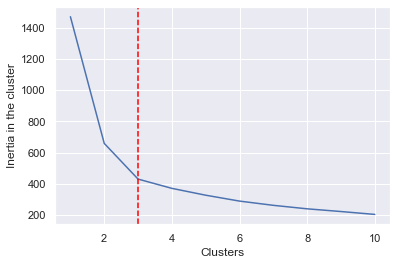

In [57]:
plt.plot(range(1,11), wss)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.axvline(x=3, linestyle = '--', color='red')
plt.show()

In [58]:
kmeans_4 = KMeans(n_clusters = 4)
kmeans_4.fit(scaled_data)
labels_4 = kmeans_4.labels_

In [59]:
kmeans_4_data=bm.copy()

In [60]:
kmeans_4_data["Kmeans_Cluster"] = labels_4
kmeans_4_data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Kmeans_Cluster
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,2
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,2
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,2


In [61]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [62]:
silhouette_score(scaled_data,labels_4)

0.32757426605518075

In [63]:
silhouette_samples(scaled_data,labels_4).min()

-0.05384082699360069

In [64]:
from sklearn import metrics

In [65]:
scores = []
k_range = range(2, 11)
for k in k_range:
    km=KMeans(n_clusters=k, random_state=2)
    km.fit(scaled_data)
    scores.append(metrics.silhouette_score(scaled_data, km.labels_))

In [66]:
scores

[0.46577247686580914,
 0.4007270552751298,
 0.3347542296283262,
 0.28621461554288646,
 0.285726896652541,
 0.2756098749293962,
 0.24943558736282173,
 0.26663669211924323,
 0.27312884882199157]

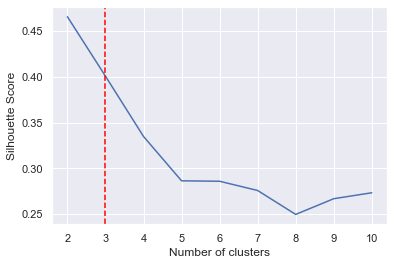

In [67]:
#plotting the sc scores
plt.plot(k_range,scores)
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.axvline(x=3, linestyle = '--', color='red')
plt.show()

In [68]:
sil_width = silhouette_samples(scaled_data,labels_4)

In [69]:
kmeans_4_data["sil_width"] = sil_width
kmeans_4_data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Kmeans_Cluster,sil_width
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,2,0.445327
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3,0.049939
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,2,0.443575
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185,0,0.532008
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,2,0.081568


In [70]:
# 3 Cluster Solution

In [71]:
#fitting the Kmeans
kmeans_3 = KMeans(n_clusters = 3,random_state=123)
kmeans_3.fit(scaled_data)
kmeans_3.labels_

array([1, 0, 1, 2, 1, 2, 2, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 2, 2, 2, 2,
       1, 2, 0, 1, 0, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1,
       2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1,
       1, 0, 1, 2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 0, 0, 0, 0, 1, 2, 0, 1, 0,
       1, 2, 0, 1, 0, 2, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       0, 0, 1, 2, 2, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 2, 0,
       0, 1, 2, 1, 1, 2, 1, 0, 0, 0, 2, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 0,
       2, 0, 0, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0, 0, 0, 2, 0, 2, 0, 1, 1, 1,
       0, 2, 0, 2, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 2, 0, 2, 1, 0, 1, 1, 2,
       1, 2, 0, 1, 0, 2, 1, 0, 1, 0, 0, 0])

In [72]:
silhouette_score(scaled_data,kmeans_3.labels_)

0.4007270552751298

In [73]:
silhouette_samples(scaled_data,kmeans_3.labels_).min()

0.002713089347678376

In [74]:
#proportion of labels classified
pd.Series(kmeans_3.labels_).value_counts().sort_index()

0    71
1    67
2    72
dtype: int64

In [75]:
#K-Means Clustering & Cluster Information

In [76]:
kmeans1_data=bm.copy()

In [77]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(scaled_data)

#beginning of the cluster numbering with 1 instead of 0
y_kmeans1=y_kmeans
y_kmeans1=y_kmeans+1

# New Dataframe called cluster
cluster = pd.DataFrame(y_kmeans1)

# Adding cluster to the Dataset1
kmeans1_data['cluster'] = cluster

#Mean of clusters
kmeans_cluster = pd.DataFrame(round(kmeans1_data.groupby('cluster').mean(),1))
kmeans_cluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
cluster,,,,,,,
1,14.4,14.3,0.9,5.5,3.3,2.7,5.1
2,11.9,13.2,0.8,5.2,2.8,4.7,5.1
3,18.5,16.2,0.9,6.2,3.7,3.6,6.0


In [78]:
def ClusterPercentage(datafr,name):
#Common utility function to calculate the percentage and size of cluster"""
 size = pd.Series(datafr[name].value_counts().sort_index())
 percent = pd.Series(round(datafr[name].value_counts()/datafr.shape[0] * 100,2)).sort_index()
 size_df = pd.concat([size, percent],axis=1)
 size_df.columns = ["Cluster_Size","Cluster_Percentage"]
 return(size_df)

In [79]:
ClusterPercentage(kmeans1_data,"cluster")

,Cluster_Size,Cluster_Percentage
1,71,33.81
2,72,34.29
3,67,31.90


In [80]:
#transposing the cluster
cluster_3_T = kmeans_cluster.T

# 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

In [81]:
# 3 group cluster via Kmeans

In [82]:
pd.Series(kmeans_3.labels_).value_counts()

2    72
0    71
1    67
dtype: int64

In [83]:
kmeans_cluster.T

cluster,1,2,3
spending,14.4,11.9,18.5
advance_payments,14.3,13.2,16.2
probability_of_full_payment,0.9,0.8,0.9
current_balance,5.5,5.2,6.2
credit_limit,3.3,2.8,3.7
min_payment_amt,2.7,4.7,3.6
max_spent_in_single_shopping,5.1,5.1,6.0


In [84]:
#3 group cluster via hierarchical clustering

In [85]:
wardlinkage_clustered_1_data['3Clusters'].value_counts().sort_index()

1    70
2    67
3    73
Name: 3Clusters, dtype: int64

In [86]:
aggdata.T

3Clusters,1,2,3
spending,18.371429,11.872388,14.199041
advance_payments,16.145429,13.257015,14.233562
probability_of_full_payment,0.884400,0.848072,0.879190
current_balance,6.158171,5.238940,5.478233
credit_limit,3.684629,2.848537,3.226452
min_payment_amt,3.639157,4.949433,2.612181
max_spent_in_single_shopping,6.017371,5.122209,5.086178
Freq,70.000000,67.000000,73.000000


# PROBLEM 2-CART-RF-ANN

In [87]:
#Import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from scipy import stats  # Import stats from scipy

In [88]:
ins= pd.read_csv("insurance_part2_data-2.csv")

In [89]:
ins

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2995,28,CWT,Travel Agency,Yes,166.53,Online,364,256.20,Gold Plan,Americas
2996,35,C2B,Airlines,No,13.50,Online,5,54.00,Gold Plan,ASIA
2997,36,EPX,Travel Agency,No,0.00,Online,54,28.00,Customised Plan,ASIA
2998,34,C2B,Airlines,Yes,7.64,Online,39,30.55,Bronze Plan,ASIA


# 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [90]:
ins.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [91]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [92]:
ins.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,3000.0,NaN,NaN,NaN,38.091,10.463518,8.0,32.0,36.0,42.0,84.0
Agency_Code,3000,4,EPX,1365,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,3000,2,Travel Agency,1837,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Claimed,3000,2,No,2076,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Commision,3000.0,NaN,NaN,NaN,14.529203,25.481455,0.0,0.0,4.63,17.235,210.21
Channel,3000,2,Online,2954,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Duration,3000.0,NaN,NaN,NaN,70.001333,134.053313,-1.0,11.0,26.5,63.0,4580.0
Sales,3000.0,NaN,NaN,NaN,60.249913,70.733954,0.0,20.0,33.0,69.0,539.0
Product Name,3000,5,Customised Plan,1136,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Destination,3000,3,ASIA,2465,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
ins.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

In [94]:
#Check for duplicate data

In [95]:
dups =ins.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
ins[dups]

Number of duplicate rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
...,...,...,...,...,...,...,...,...,...,...
2940,36,EPX,Travel Agency,No,0.0,Online,8,10.0,Cancellation Plan,ASIA
2947,36,EPX,Travel Agency,No,0.0,Online,10,28.0,Customised Plan,ASIA
2952,36,EPX,Travel Agency,No,0.0,Online,2,10.0,Cancellation Plan,ASIA
2962,36,EPX,Travel Agency,No,0.0,Online,4,20.0,Customised Plan,ASIA


In [96]:
#Removing Duplicates

In [97]:
ins.drop_duplicates(inplace=True)
dups=ins.duplicated()
print('Number of duplicate rows = %d'%(dups.sum()))
print(ins.shape)

Number of duplicate rows = 0
(2861, 10)


In [98]:
#Checking for outliers

<AxesSubplot:>

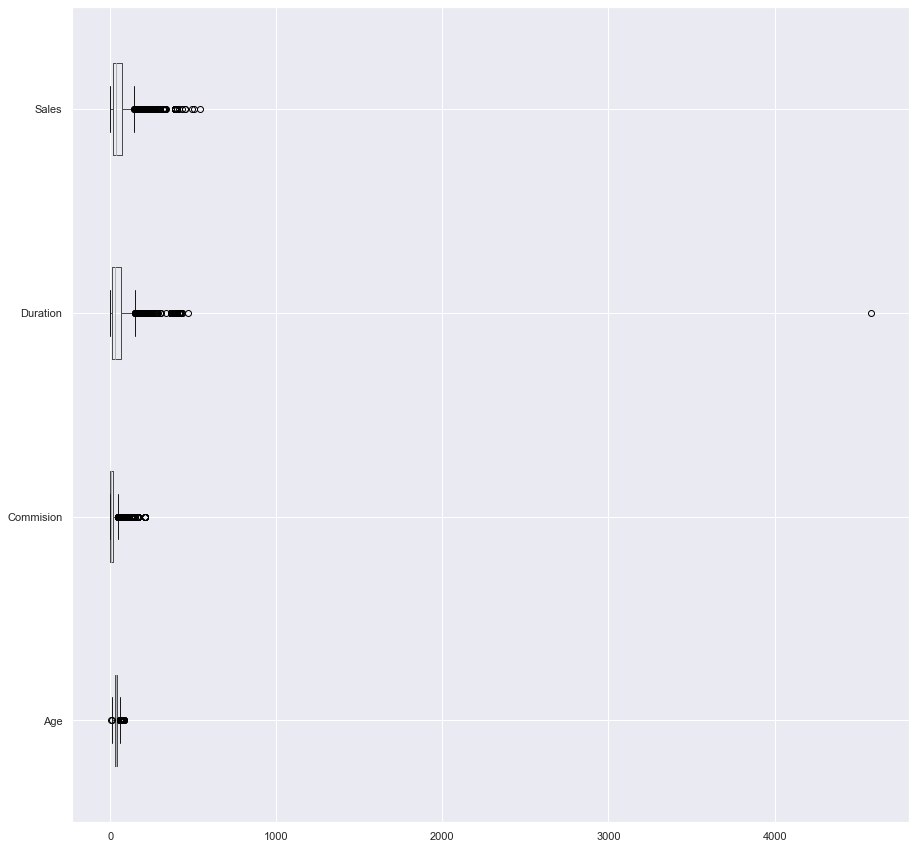

In [99]:
plt.figure(figsize=(15,15))
ins[["Age","Commision","Duration","Sales"]].boxplot(vert=0)

In [100]:
ins.shape

(2861, 10)

In [101]:
for column in ins[['Agency_Code', 'Type', 'Claimed', 'Channel','Product Name', 'Destination']]:
    print(column.upper(),': ',ins[column].nunique())
    print(ins[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     471
C2B     913
EPX    1238
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1152
Travel Agency    1709
Name: Type, dtype: int64


CLAIMED :  2
Yes     914
No     1947
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2815
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           421
Cancellation Plan     615
Bronze Plan           645
Customised Plan      1071
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     319
ASIA        2327
Name: Destination, dtype: int64




In [102]:
#Univariate Analysis for each variable

In [103]:
ins_cat = ins.select_dtypes(include = ['object'])
lstcatcolumns = list(ins_cat.columns.values)
lstcatcolumns

['Agency_Code', 'Type', 'Claimed', 'Channel', 'Product Name', 'Destination']

In [104]:
ins_num = ins.select_dtypes(include = ['int64', 'float64'])
lstnumcolumns = list(ins_num.columns.values)
lstnumcolumns

['Age', 'Commision', 'Duration', 'Sales']

In [105]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("-----------------------------------------")
    print(ins[column].describe(),end='')
    
    print('\n')
    plt.figure()
    print("Distribution of " + column)
    print("-----------------------------------------")
    sns.distplot(ins[column], kde=True, color='b');
    plt.show()
    
    print('\n')
    plt.figure()
    print("BoxPlot of " + column)
    print("-----------------------------------------")
    ax = sns.boxplot(x=ins[column])
    plt.show()

Description of Age
-----------------------------------------
count    2861.000000
mean       38.204124
std        10.678106
min         8.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        84.000000
Name: Age, dtype: float64

Distribution of Age
-----------------------------------------


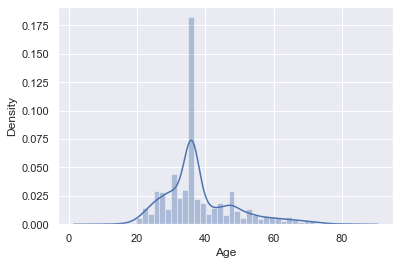



BoxPlot of Age
-----------------------------------------


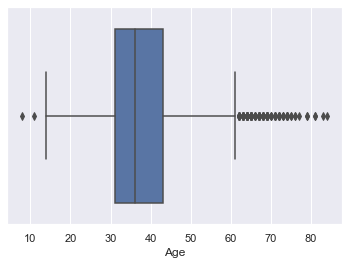

Description of Commision
-----------------------------------------
count    2861.000000
mean       15.080996
std        25.826834
min         0.000000
25%         0.000000
50%         5.630000
75%        17.820000
max       210.210000
Name: Commision, dtype: float64

Distribution of Commision
-----------------------------------------


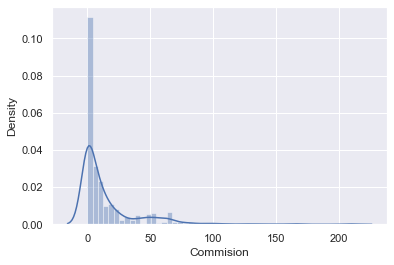



BoxPlot of Commision
-----------------------------------------


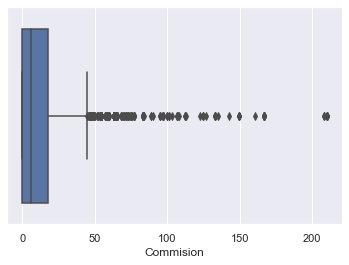

Description of Duration
-----------------------------------------
count    2861.000000
mean       72.120238
std       135.977200
min        -1.000000
25%        12.000000
50%        28.000000
75%        66.000000
max      4580.000000
Name: Duration, dtype: float64

Distribution of Duration
-----------------------------------------


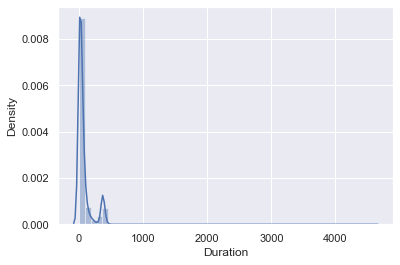



BoxPlot of Duration
-----------------------------------------


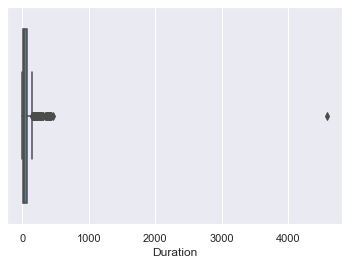

Description of Sales
-----------------------------------------
count    2861.000000
mean       61.757878
std        71.399740
min         0.000000
25%        20.000000
50%        33.500000
75%        69.300000
max       539.000000
Name: Sales, dtype: float64

Distribution of Sales
-----------------------------------------


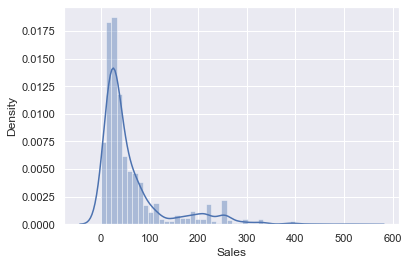



BoxPlot of Sales
-----------------------------------------


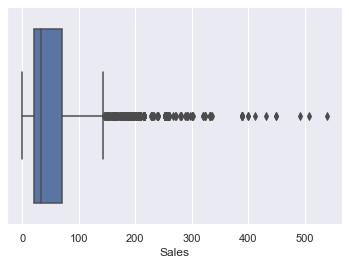

In [106]:
for x in lstnumcolumns:
    univariateAnalysis_numeric(x,20)

In [107]:
#Calculating the Quartiles for each numeric variable/categorical variables

In [108]:
#Quartiles for Age Variable
Q1=ins['Age'].quantile(q=0.25)
Q3=ins['Age'].quantile(q=0.75)
print('Age - Q1 is: ', Q1)
print('Age - Q3 is: ', Q3)
print('IQR of Age is ', stats.iqr(ins['Age']))

#Outlier detection from Interquartile range (IQR) in original data
# IQR=Q3-Q1
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Age: ', L_outliers)
print('Upper outliers in Age: ', U_outliers)

Age - Q1 is:  31.0
Age - Q3 is:  43.0
IQR of Age is  12.0
Lower outliers in Age:  13.0
Upper outliers in Age:  61.0


In [109]:
#Quartiles for Commision Variable
Q1=ins['Commision'].quantile(q=0.25)
Q3=ins['Commision'].quantile(q=0.75)
print('Commision - Q1 is: ', Q1)
print('Commision - Q3 is: ', Q3)
print('IQR of Commision is ', stats.iqr(ins['Commision']))

#Outlier detection from Interquartile range (IQR) in original data
# IQR=Q3-Q1
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Commision: ', L_outliers)
print('Upper outliers in Commision: ', U_outliers)

Commision - Q1 is:  0.0
Commision - Q3 is:  17.82
IQR of Commision is  17.82
Lower outliers in Commision:  -26.73
Upper outliers in Commision:  44.55


In [110]:
#Quartiles for Duration Variable
Q1=ins['Duration'].quantile(q=0.25)
Q3=ins['Duration'].quantile(q=0.75)
print('Duration - Q1 is: ', Q1)
print('Duration - Q3 is: ', Q3)
print('IQR of Duration is ', stats.iqr(ins['Duration']))

#Outlier detection from Interquartile range (IQR) in original data
# IQR=Q3-Q1
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Duration: ', L_outliers)
print('Upper outliers in Duration: ', U_outliers)

Duration - Q1 is:  12.0
Duration - Q3 is:  66.0
IQR of Duration is  54.0
Lower outliers in Duration:  -69.0
Upper outliers in Duration:  147.0


In [111]:
#Quartiles for Sales Variable
Q1=ins['Sales'].quantile(q=0.25)
Q3=ins['Sales'].quantile(q=0.75)
print('Sales - Q1 is: ', Q1)
print('Sales - Q3 is: ', Q3)
print('IQR of Sales is ', stats.iqr(ins['Sales']))

#Outlier detection from Interquartile range (IQR) in original data
# IQR=Q3-Q1
L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outliers in Sales: ', L_outliers)
print('Upper outliers in Sales: ', U_outliers)

Sales - Q1 is:  20.0
Sales - Q3 is:  69.3
IQR of Sales is  49.3
Lower outliers in Sales:  -53.94999999999999
Upper outliers in Sales:  143.25


In [112]:
def replace_outlier(col):
    Q1, Q3 = np.quantile(col, [.25, .75])
    IQR = Q3 - Q1
    LL = Q1 - 1.5*IQR
    UL = Q3 + 1.5*IQR
    return LL, UL

In [113]:
df_num = ins[['Age', 'Commision', 'Duration', 'Sales']]

In [114]:
for i in df_num.columns:
    LL, UL = replace_outlier(df_num[i])
    df_num[i] = np.where(df_num[i]> UL, UL, df_num[i])
    df_num[i] = np.where(df_num[i]< LL, LL, df_num[i])

<AxesSubplot:>

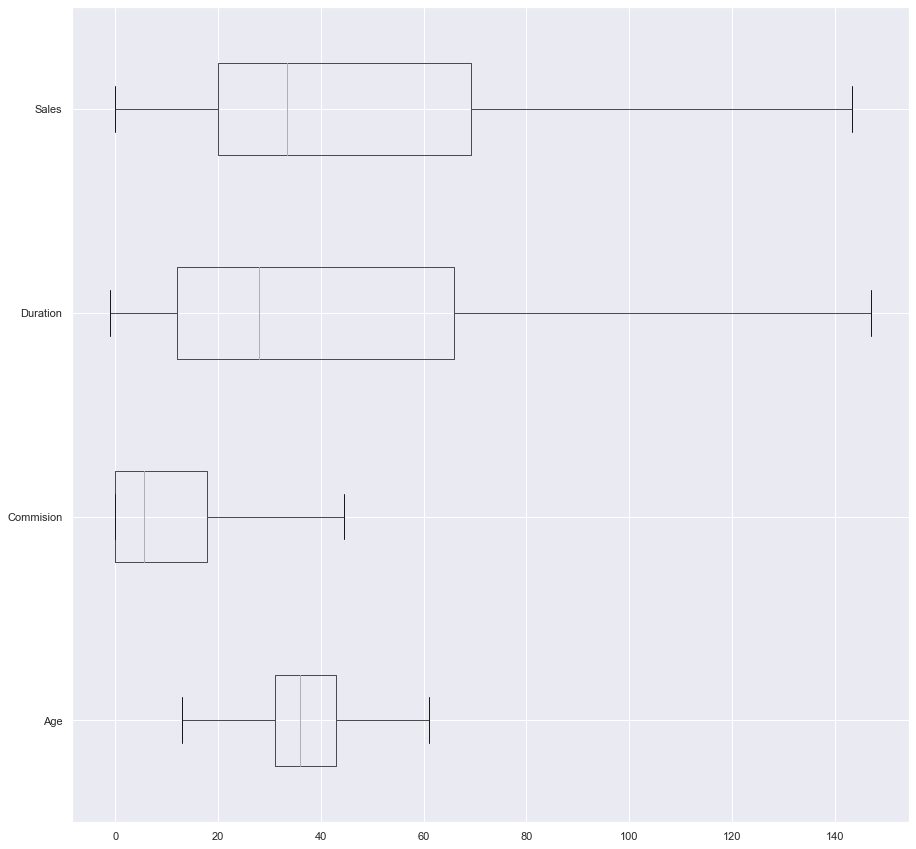

In [115]:
plt.figure(figsize=(15,15))
df_num.boxplot(vert=0)

In [116]:
#Agency_Code variable

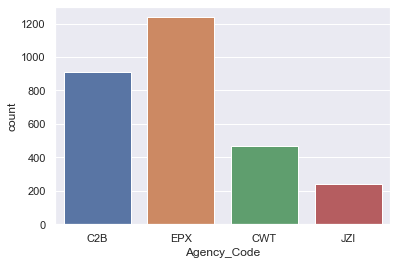

In [117]:
sns.countplot(data = ins, x = 'Agency_Code');

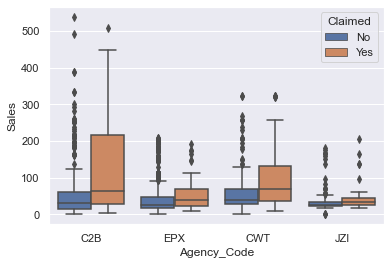

In [118]:
sns.boxplot(data = ins, x='Agency_Code',y='Sales', hue='Claimed');

In [119]:
ins['Agency_Code'].value_counts()

EPX    1238
C2B     913
CWT     471
JZI     239
Name: Agency_Code, dtype: int64

In [120]:
#Channel variable

In [121]:
ins['Channel'].value_counts()

Online     2815
Offline      46
Name: Channel, dtype: int64

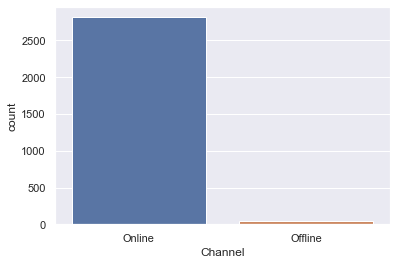

In [122]:
sns.countplot(data = ins, x = 'Channel');

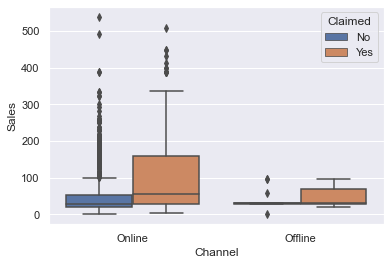

In [123]:
sns.boxplot(data = ins, x='Channel',y='Sales', hue='Claimed');

In [124]:
#Product Name variable

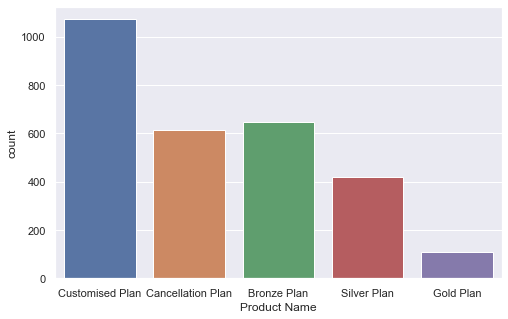

In [125]:
plt.figure(figsize=(8,5))
sns.countplot(data = ins, x = 'Product Name');

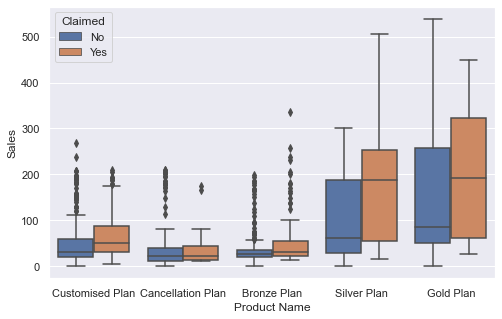

In [126]:
plt.figure(figsize=(8,5))
sns.boxplot(data = ins, x='Product Name',y='Sales', hue='Claimed');

In [127]:
ins['Product Name'].value_counts()

Customised Plan      1071
Bronze Plan           645
Cancellation Plan     615
Silver Plan           421
Gold Plan             109
Name: Product Name, dtype: int64

In [128]:
#Destination variable

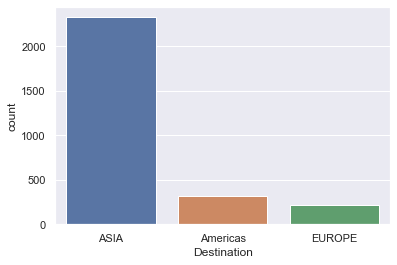

In [129]:
sns.countplot(data = ins, x = 'Destination');

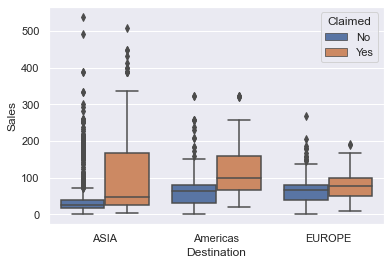

In [130]:
sns.boxplot(data = ins, x='Destination',y='Sales', hue='Claimed');

In [131]:
ins['Destination'].value_counts()

ASIA        2327
Americas     319
EUROPE       215
Name: Destination, dtype: int64

In [132]:
#Multivariate Analysis 

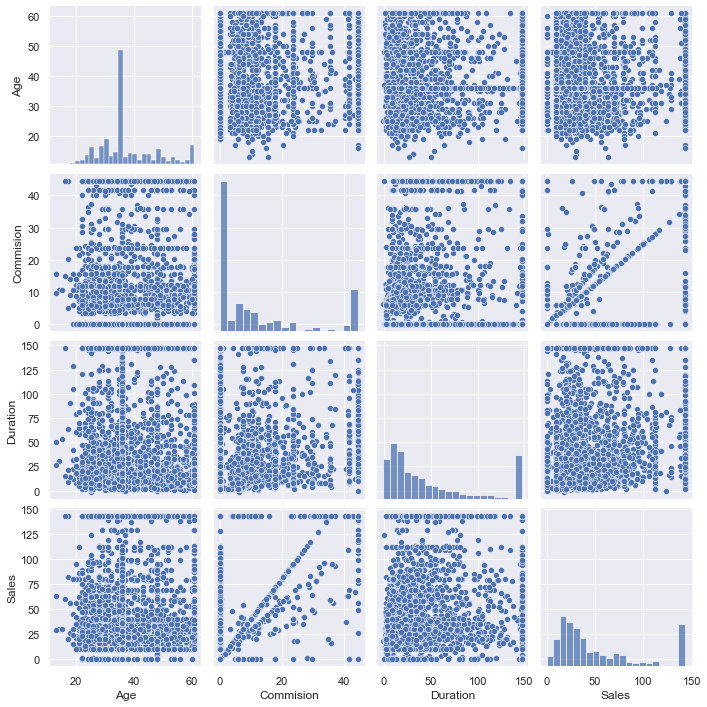

In [133]:
#Checking pairwise distribution of the continuous variables
sns.pairplot(df_num)

<AxesSubplot:>

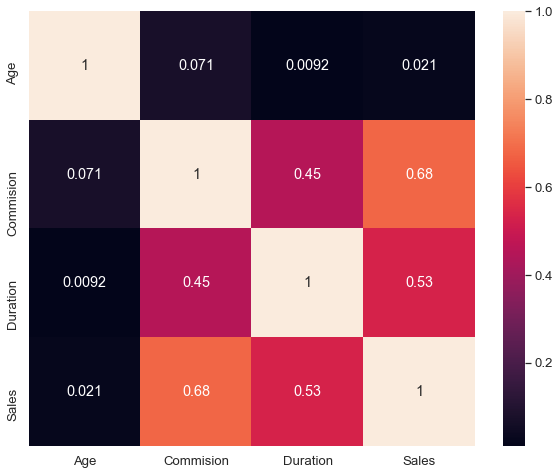

In [134]:
# construct heatmap with only continuous variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df_num.corr(), annot=True)

In [135]:
corr = df_num.corr()

In [136]:
corr

,Age,Commision,Duration,Sales
Age,1.000000,0.071246,0.009216,0.021450
Commision,0.071246,1.000000,0.453225,0.682537
Duration,0.009216,0.453225,1.000000,0.534512
Sales,0.021450,0.682537,0.534512,1.000000


# 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

# 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model.

In [137]:
#Converting all objects to categorical codes

In [138]:
for feature in ins.columns:
    if ins[feature].dtype == 'object':
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(ins[feature].unique()))
        print(pd.Categorical(ins[feature].unique()).codes)
        ins[feature] = pd.Categorical(ins[feature]).codes



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


In [139]:
ins[feature].dtype

dtype('int8')

In [140]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   int8   
 2   Type          2861 non-null   int8   
 3   Claimed       2861 non-null   int8   
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   int8   
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   int8   
 9   Destination   2861 non-null   int8   
dtypes: float64(2), int64(2), int8(6)
memory usage: 193.1 KB


In [141]:
ins.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [142]:
#Proportion of 1s and 0s

In [143]:
ins.Claimed.value_counts(normalize=True)

0    0.680531
1    0.319469
Name: Claimed, dtype: float64

In [144]:
#Extracting the target column into separate vectors for training set and test set

In [145]:
X = ins.drop("Claimed", axis=1)
y = ins.pop("Claimed")
X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


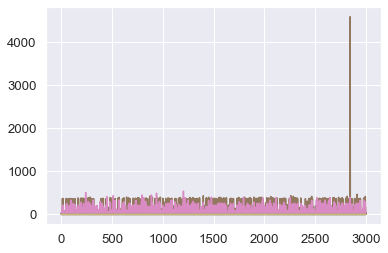

In [146]:
# prior to scaling
plt.plot(X)
plt.show()

In [147]:
# Scaling the attributes.
from scipy.stats import zscore
X_scaled=X.apply(zscore)
X_scaled.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,0.917540,-1.276081,-1.217993,-0.556921,0.127832,-0.478989,-0.829950,0.260997,-0.446648
1,-0.206451,0.716750,0.821023,-0.584029,0.127832,-0.280392,-0.584949,0.260997,-0.446648
2,0.074546,-0.279665,0.821023,-0.353996,0.127832,-0.508411,-0.726430,0.260997,1.259439
3,-0.206451,0.716750,0.821023,-0.584029,0.127832,-0.501056,-0.500900,-0.521721,-0.446648
4,-0.487449,1.713166,-1.217993,-0.340055,0.127832,-0.140638,-0.612965,-1.304440,-0.446648


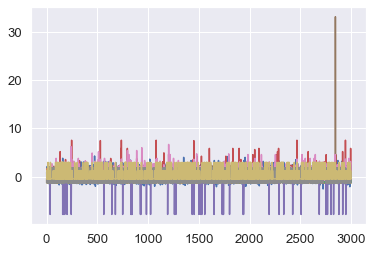

In [148]:
# after scaling the data
plt.plot(X_scaled)
plt.show()

In [149]:
#Splitting data into training and test set

In [150]:
from sklearn.model_selection import train_test_split
X_train, X_test, train_labels, test_labels = train_test_split(X_scaled, y, test_size=.30,random_state=0)

In [151]:
#Checking the dimensions of the training and test data

In [152]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',train_labels.shape)
print('test_labels',test_labels.shape)

X_train (2002, 9)
X_test (859, 9)
train_labels (2002,)
test_labels (859,)


# Model 1 - Building Decision Tree- CART Model

In [153]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [10,20,30,50],
    'min_samples_leaf': [50,100,150],
    'min_samples_split': [150,300,450],
}
dtcl = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 10)

In [154]:
grid_search.fit(X_train, train_labels)
print(grid_search.best_params_)
best_grid = grid_search.best_estimator_
best_grid

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 300}


DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=300)

In [155]:
#Generating decision Tree

In [156]:
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid, out_file= tree_regularized , feature_names =list(X_train), class_names = list(train_char_label))
tree_regularized.close()
dot_data

In [157]:
#Variable Importance - DTCL

In [158]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"],
index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.640280
Sales         0.303567
Product Name  0.036594
Duration      0.013120
Commision     0.006438
Age           0.000000
Type          0.000000
Channel       0.000000
Destination   0.000000


In [159]:
#Predicting on Training and Test dataset

In [160]:
ytrain_predict = best_grid.predict(X_train)
ytest_predict= best_grid.predict(X_test)

In [161]:
#Getting the Predicted Classes and Probs

In [162]:
ytest_predict
ytest_predict_prob=best_grid.predict_proba(X_test)
ytest_predict_prob
pd.DataFrame(ytest_predict_prob).head(10)

,0,1
0,0.230216,0.769784
1,0.923529,0.076471
2,0.230216,0.769784
3,0.711864,0.288136
4,0.451724,0.548276
5,0.451724,0.548276
6,0.901141,0.098859
7,0.621469,0.378531
8,0.711864,0.288136
9,0.901141,0.098859


In [163]:
#Model Evaluation

In [164]:
#AUC and ROC for the training data

AUC: 0.815


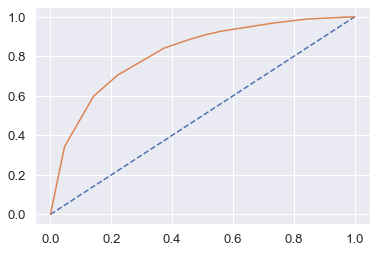

In [165]:
# predict probabilities
probs = best_grid.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

In [166]:
#AUC and ROC for the test data

AUC: 0.778


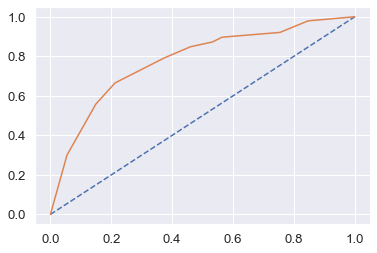

In [167]:
# predict probabilities
probs = best_grid.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

In [168]:
#Confusion Matrix for the training data

In [169]:
confusion_matrix(train_labels, ytrain_predict)

array([[1183,  195],
       [ 251,  373]], dtype=int64)

In [170]:
#Train Data Accuracy

In [171]:
cart_train_acc=best_grid.score(X_train,train_labels) 
cart_train_acc

0.7772227772227772

In [172]:
print(classification_report(train_labels, ytrain_predict))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1378
           1       0.66      0.60      0.63       624

    accuracy                           0.78      2002
   macro avg       0.74      0.73      0.73      2002
weighted avg       0.77      0.78      0.77      2002



In [173]:
cart_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_precision=round(df.loc["1"][0],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_f1=round(df.loc["1"][2],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.66
cart_train_recall  0.6
cart_train_f1  0.63


In [174]:
#Confusion Matrix for test data

In [175]:
confusion_matrix(test_labels, ytest_predict)

array([[484,  85],
       [128, 162]], dtype=int64)

In [176]:
#Test Data Accuracy
cart_test_acc=best_grid.score(X_test,test_labels)
cart_test_acc

0.7520372526193247

In [177]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       569
           1       0.66      0.56      0.60       290

    accuracy                           0.75       859
   macro avg       0.72      0.70      0.71       859
weighted avg       0.75      0.75      0.75       859



In [178]:
cart_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_train_precision ',cart_test_precision)
print ('cart_train_recall ',cart_test_recall)
print ('cart_train_f1 ',cart_test_f1)

cart_train_precision  0.66
cart_train_recall  0.56
cart_train_f1  0.6


# Model 2 - Random Forest Classifier

In [179]:
from sklearn.ensemble import RandomForestClassifier

In [180]:
rfcl=RandomForestClassifier(n_estimators=300,
                            oob_score=True,
                            max_depth=10,
                            max_features=6,
                            min_samples_leaf=20,
                            min_samples_split=60)

In [181]:
rfcl.fit(X_train,train_labels)

RandomForestClassifier(max_depth=10, max_features=6, min_samples_leaf=20,
                       min_samples_split=60, n_estimators=300, oob_score=True)

In [182]:
rfcl.oob_score_

0.7812187812187812

In [183]:
param_grid = {
    'max_depth': [10,20],
    'max_features': [6,8],
    'min_samples_leaf': [10,12],
    'min_samples_split': [50,60],
    'n_estimators': [300,400]
}
rfcl = RandomForestClassifier()
grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 5)

In [184]:
grid_search.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20], 'max_features': [6, 8],
                         'min_samples_leaf': [10, 12],
                         'min_samples_split': [50, 60],
                         'n_estimators': [300, 400]})

In [185]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': 6,
 'min_samples_leaf': 10,
 'min_samples_split': 60,
 'n_estimators': 400}

In [186]:
best_grid = grid_search.best_estimator_

In [187]:
best_grid

RandomForestClassifier(max_depth=20, max_features=6, min_samples_leaf=10,
                       min_samples_split=60, n_estimators=400)

In [188]:
#Predicting the Training and Testing data

In [189]:
ytrain_predict=best_grid.predict(X_train)
ytest_predict=best_grid.predict(X_test)

In [190]:
#RF Model Performance Evaluation on Training data

In [191]:
#Confusion Matrix for the training data

In [192]:
confusion_matrix(train_labels,ytrain_predict)

array([[1234,  144],
       [ 244,  380]], dtype=int64)

In [193]:
#Train Data Accuracy

In [194]:
rf_train_acc=best_grid.score(X_train,train_labels)
rf_train_acc

0.8061938061938062

In [195]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1378
           1       0.73      0.61      0.66       624

    accuracy                           0.81      2002
   macro avg       0.78      0.75      0.76      2002
weighted avg       0.80      0.81      0.80      2002



In [196]:
rf_metrics=classification_report(train_labels, ytrain_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][1],2)
rf_train_recall=round(df.loc["1"][2],2)
rf_train_f1=round(df.loc["1"][0],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1',rf_train_f1)

rf_train_precision  0.61
rf_train_recall  0.66
rf_train_f1 0.73


In [197]:
#AUC and ROC for the training data

Area under Curve is 0.752237542331882


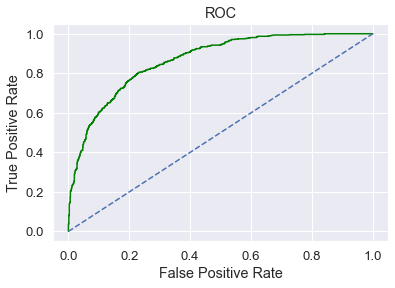

In [198]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid.predict(X_train))
print('Area under Curve is', rf_train_auc)

In [199]:
#Confusion Matrix for test data

In [200]:
confusion_matrix(test_labels,ytest_predict)

array([[489,  80],
       [124, 166]], dtype=int64)

In [201]:
#Test Data Accuracy

In [202]:
rf_test_acc=best_grid.score(X_test,test_labels)
rf_test_acc

0.7625145518044237

In [203]:
print(classification_report(test_labels, ytest_predict))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83       569
           1       0.67      0.57      0.62       290

    accuracy                           0.76       859
   macro avg       0.74      0.72      0.72       859
weighted avg       0.76      0.76      0.76       859



In [204]:
rf_metrics=classification_report(test_labels, ytest_predict,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][1],2)
rf_test_recall=round(df.loc["1"][2],2)
rf_test_f1=round(df.loc["1"][0],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.57
rf_test_recall  0.62
rf_test_f1  0.67


In [205]:
#AUC and ROC for the test data

Area under Curve is 0.7932549542451973


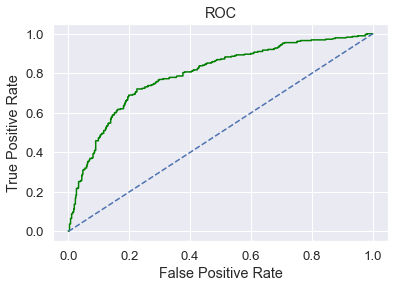

In [206]:
rf_test_fpr,rf_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0,1], [0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is',rf_test_auc)

In [207]:
print (pd.DataFrame(best_grid.feature_importances_, columns = ["Imp"], index =
X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.361369
Sales         0.202653
Product Name  0.173062
Duration      0.092878
Commision     0.089487
Age           0.051402
Type          0.017276
Destination   0.008496
Channel       0.003378


# Model 3 - Neural Network Classifier

In [208]:
from sklearn.neural_network import MLPClassifier

In [209]:
#Scaling the data using standardScaler

In [210]:
from sklearn.preprocessing import StandardScaler

In [211]:
sc=StandardScaler()

In [212]:
X_train=sc.fit_transform(X_train)

In [213]:
X_train

array([[-0.20493937,  0.7144367 ,  0.82092207, ..., -0.73904567,
        -0.52656514, -0.44760203],
       [-0.20493937,  0.7144367 ,  0.82092207, ..., -0.6528162 ,
        -0.52656514, -0.44760203],
       [-0.58360906,  0.7144367 ,  0.82092207, ..., -0.59532988,
         0.25896646, -0.44760203],
       ...,
       [-1.05694618, -1.27762775, -1.21814243, ...,  0.18648401,
         1.83002967, -0.44760203],
       [-0.20493937,  0.7144367 ,  0.82092207, ..., -0.72467409,
        -0.52656514, -0.44760203],
       [-0.20493937,  0.7144367 ,  0.82092207, ...,  0.36756591,
         0.25896646, -0.44760203]])

In [214]:
X_test=sc.transform(X_test)

In [215]:
X_test

array([[ 0.55240002, -1.27762775, -1.21814243, ...,  1.96281117,
        -1.31209675, -0.44760203],
       [ 0.74173487, -0.28159552,  0.82092207, ..., -0.74048283,
         0.25896646,  1.25600874],
       [ 0.17373033, -1.27762775, -1.21814243, ...,  0.28852223,
         1.83002967, -0.44760203],
       ...,
       [-0.20493937,  0.7144367 ,  0.82092207, ..., -0.29352672,
         0.25896646, -0.44760203],
       [-0.20493937,  0.7144367 ,  0.82092207, ..., -0.5809583 ,
         0.25896646, -0.44760203],
       [-0.96227875, -1.27762775, -1.21814243, ..., -0.61688725,
         1.83002967, -0.44760203]])

In [216]:
param_grid={
    'hidden_layer_sizes': [520,100,500],
    'max_iter':[2500,3000],
    'solver': ['adam'],
    'tol': [0.01],
}
nncl=MLPClassifier(random_state=1)
grid_search=GridSearchCV(estimator=nncl,param_grid=param_grid,cv=10)

In [217]:
grid_search.fit(X_train,train_labels)
grid_search.best_params_

{'hidden_layer_sizes': 100, 'max_iter': 2500, 'solver': 'adam', 'tol': 0.01}

In [218]:
best_grid=grid_search.best_estimator_
best_grid

MLPClassifier(hidden_layer_sizes=100, max_iter=2500, random_state=1, tol=0.01)

In [219]:
#Predicting the Training and Testing data

In [220]:
ytrain_predict=best_grid.predict(X_train)
ytest_predict=best_grid.predict(X_test)

In [221]:
#NN Model Performance Evaluation on Training data

In [222]:
#Confusion Matrix for the training data
confusion_matrix(train_labels,ytrain_predict)

array([[1213,  165],
       [ 304,  320]], dtype=int64)

In [223]:
#Train Data Accuracy
nn_train_acc=best_grid.score(X_train,train_labels)
nn_train_acc

0.7657342657342657

In [224]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1378
           1       0.66      0.51      0.58       624

    accuracy                           0.77      2002
   macro avg       0.73      0.70      0.71      2002
weighted avg       0.76      0.77      0.76      2002



In [225]:
nn_metrics=classification_report(train_labels,ytrain_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print('nn_train_precision ',nn_train_precision)
print('nn_train_recall ',nn_train_recall)
print('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.66
nn_train_recall  0.51
nn_train_f1  0.58


In [226]:
#AUC and ROC for the training data

Area under Curve is 0.7992137201816083


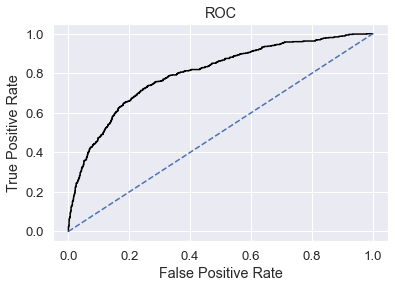

In [227]:
nn_train_fpr,nn_train_tpr,_=roc_curve(train_labels,best_grid.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0,1], [0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid.predict_proba(X_train)[:,1])
print('Area under Curve is',nn_train_auc)

In [228]:
#NN Model Performance Evaluation on Test data

In [229]:
#Confusion Matrix for test data

In [230]:
confusion_matrix(test_labels,ytest_predict)

array([[498,  71],
       [143, 147]], dtype=int64)

In [231]:
#Test Data Accuracy

In [232]:
nn_test_acc=best_grid.score(X_test,test_labels)
nn_test_acc

0.7508731082654249

In [233]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.78      0.88      0.82       569
           1       0.67      0.51      0.58       290

    accuracy                           0.75       859
   macro avg       0.73      0.69      0.70       859
weighted avg       0.74      0.75      0.74       859



In [234]:
nn_metrics=classification_report(test_labels,ytest_predict,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print('nn_test_precision ',nn_test_precision)
print('nn_test_recall ',nn_test_recall)
print('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.67
nn_test_recall  0.51
nn_test_f1  0.58


In [235]:
#AUC and ROC for the test data

Area under Curve is 0.7845221501727168


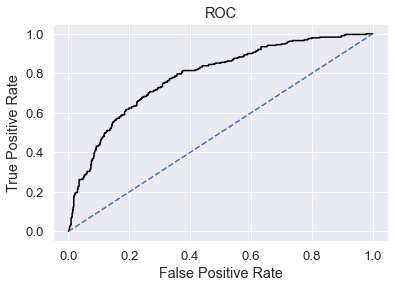

In [236]:
nn_test_fpr,nn_test_tpr,_=roc_curve(test_labels,best_grid.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0,1], [0,1],linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid.predict_proba(X_test)[:,1])
print('Area under Curve is',nn_test_auc)

In [237]:
best_grid.score

<bound method ClassifierMixin.score of MLPClassifier(hidden_layer_sizes=100, max_iter=2500, random_state=1, tol=0.01)>

# 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

# Compare all the model

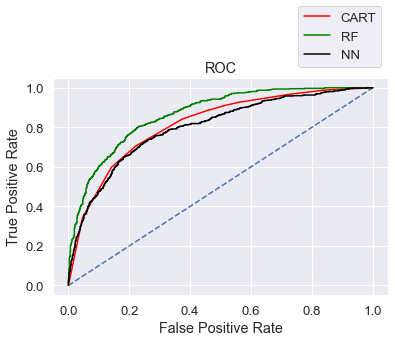

In [238]:
#AUC and ROC for the training data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

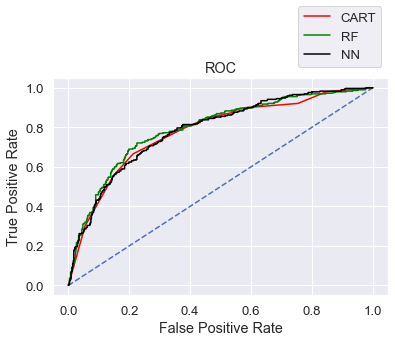

In [239]:
#AUC and ROC for the test data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

In [240]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.78,0.75,0.81,0.76,0.77,0.75
AUC,0.82,0.78,0.75,0.79,0.80,0.78
Recall,0.60,0.56,0.66,0.62,0.51,0.51
Precision,0.66,0.66,0.61,0.57,0.66,0.67
F1 Score,0.63,0.60,0.73,0.67,0.58,0.58


# -------------------------------------------------THANK YOU--------------------------------------------